In [8]:
from nyisotoolkit import NYISOData
from nyisotoolkit.nyisostat.nyisostat import table_load_weighted_price

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Covariance Risk of Renewables

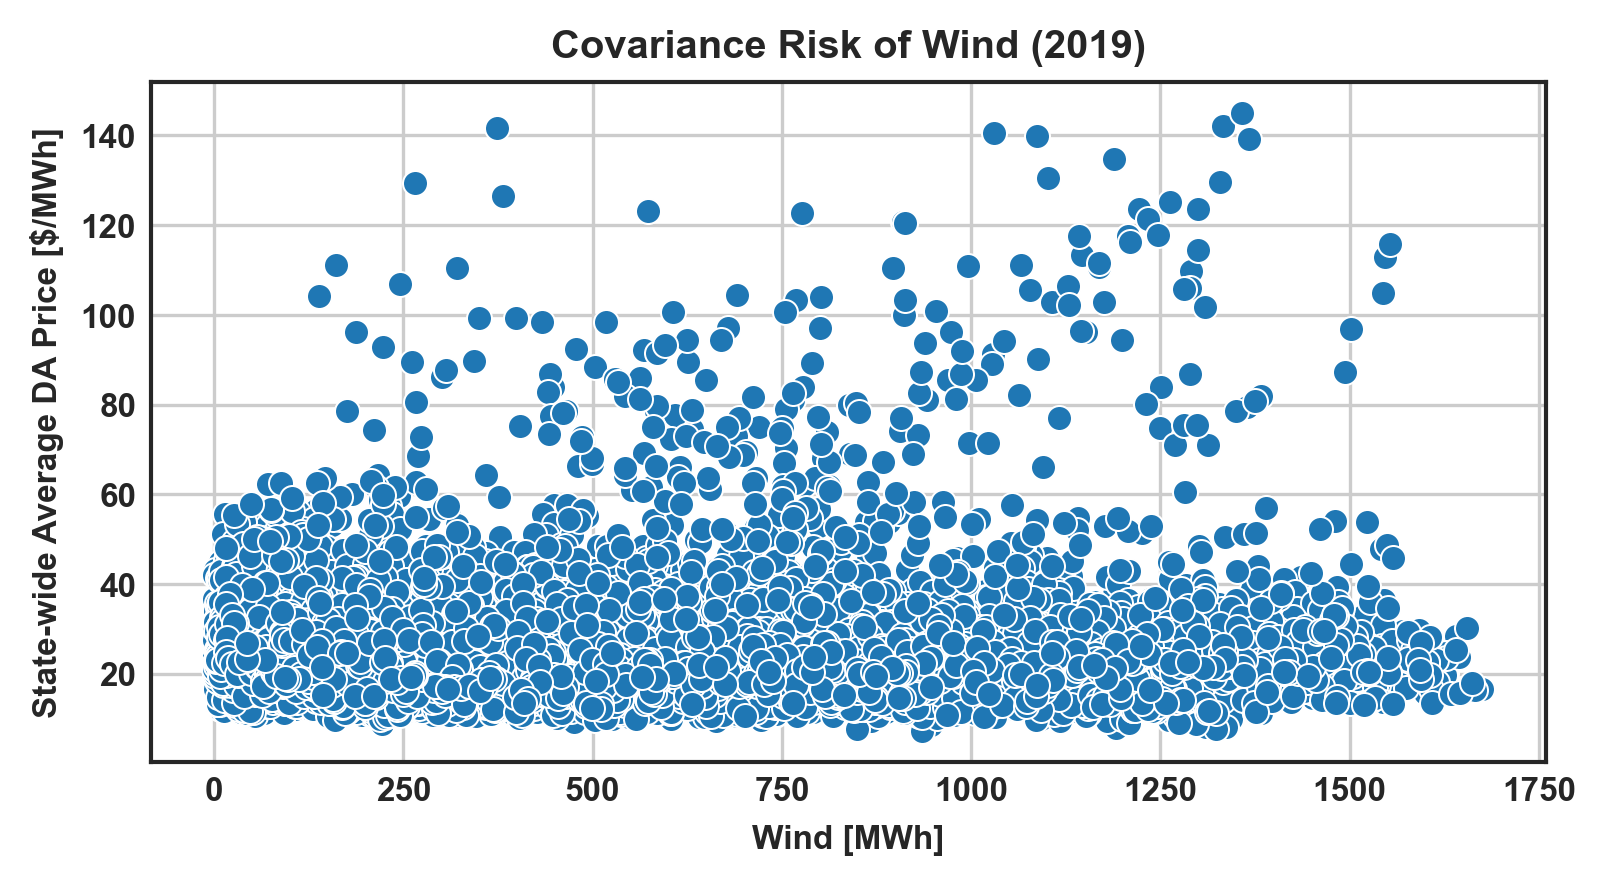

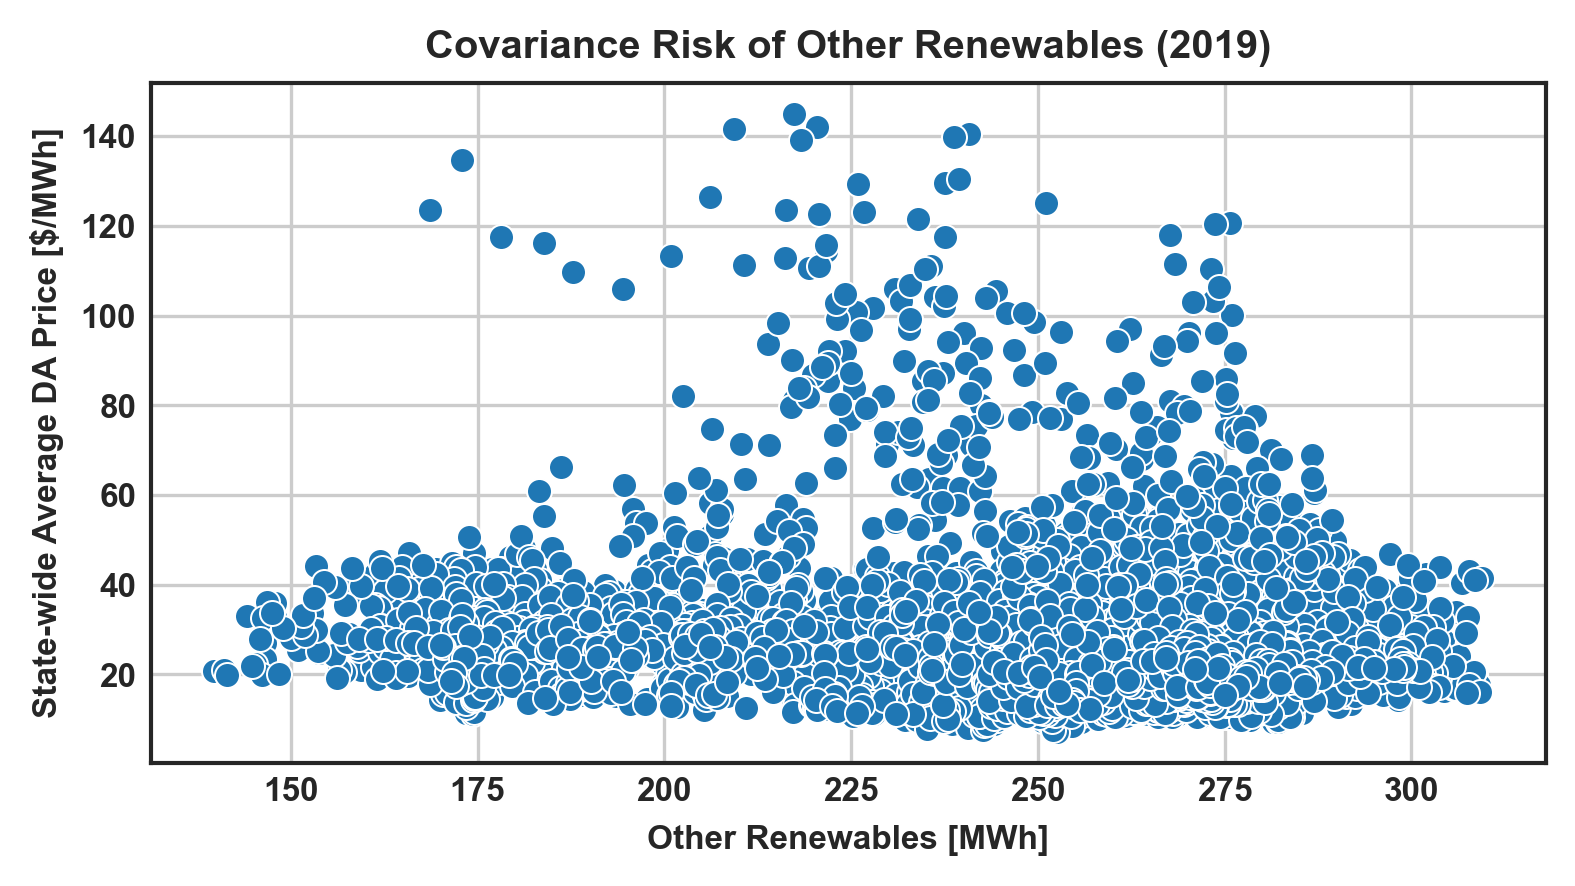

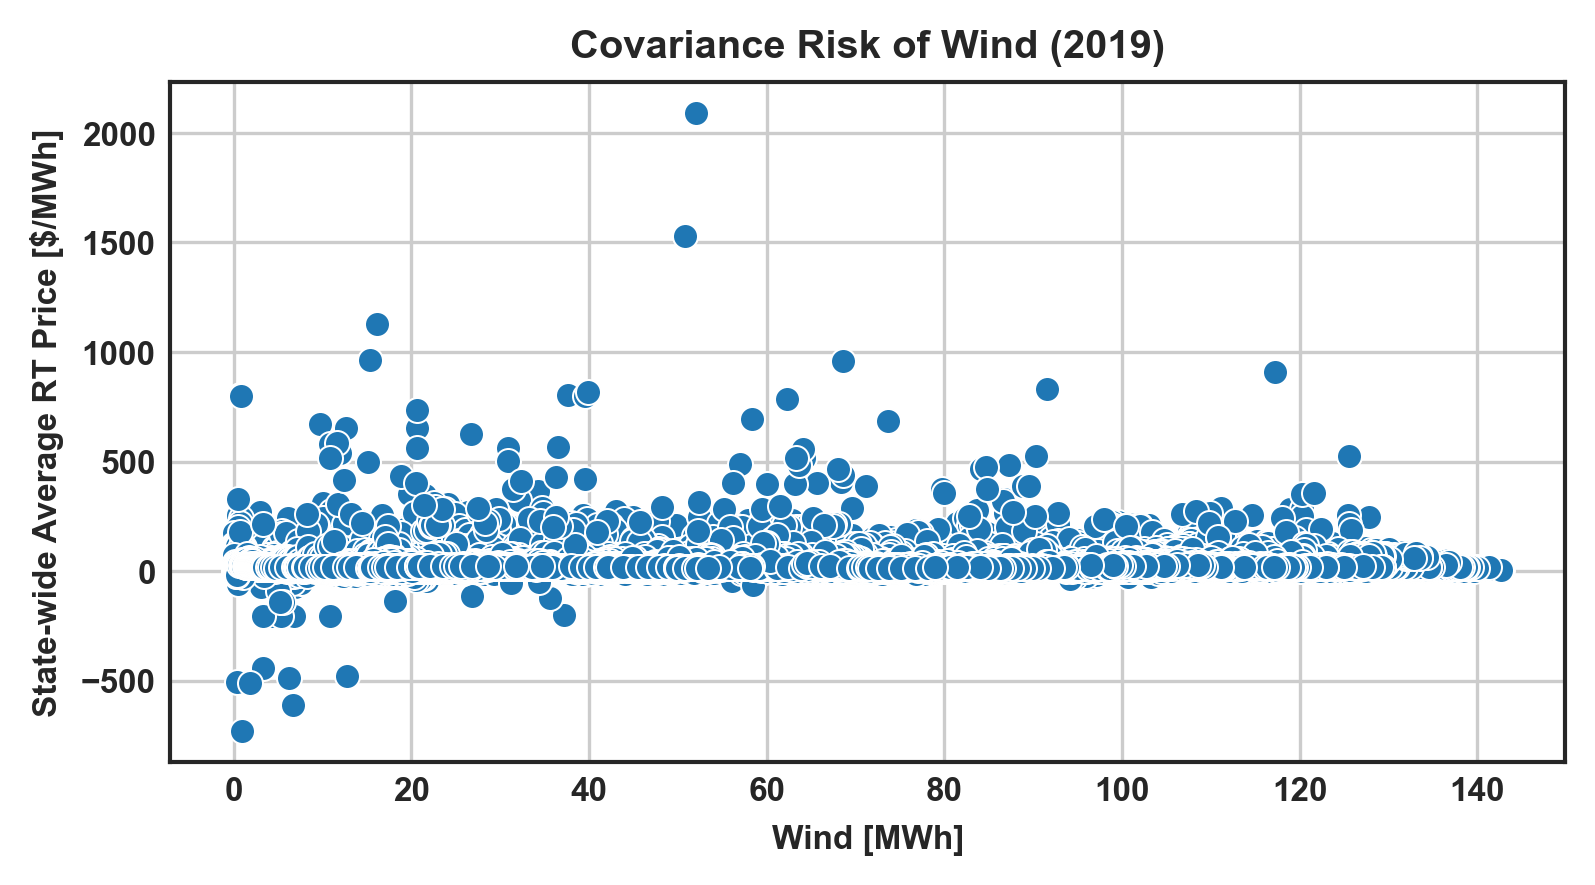

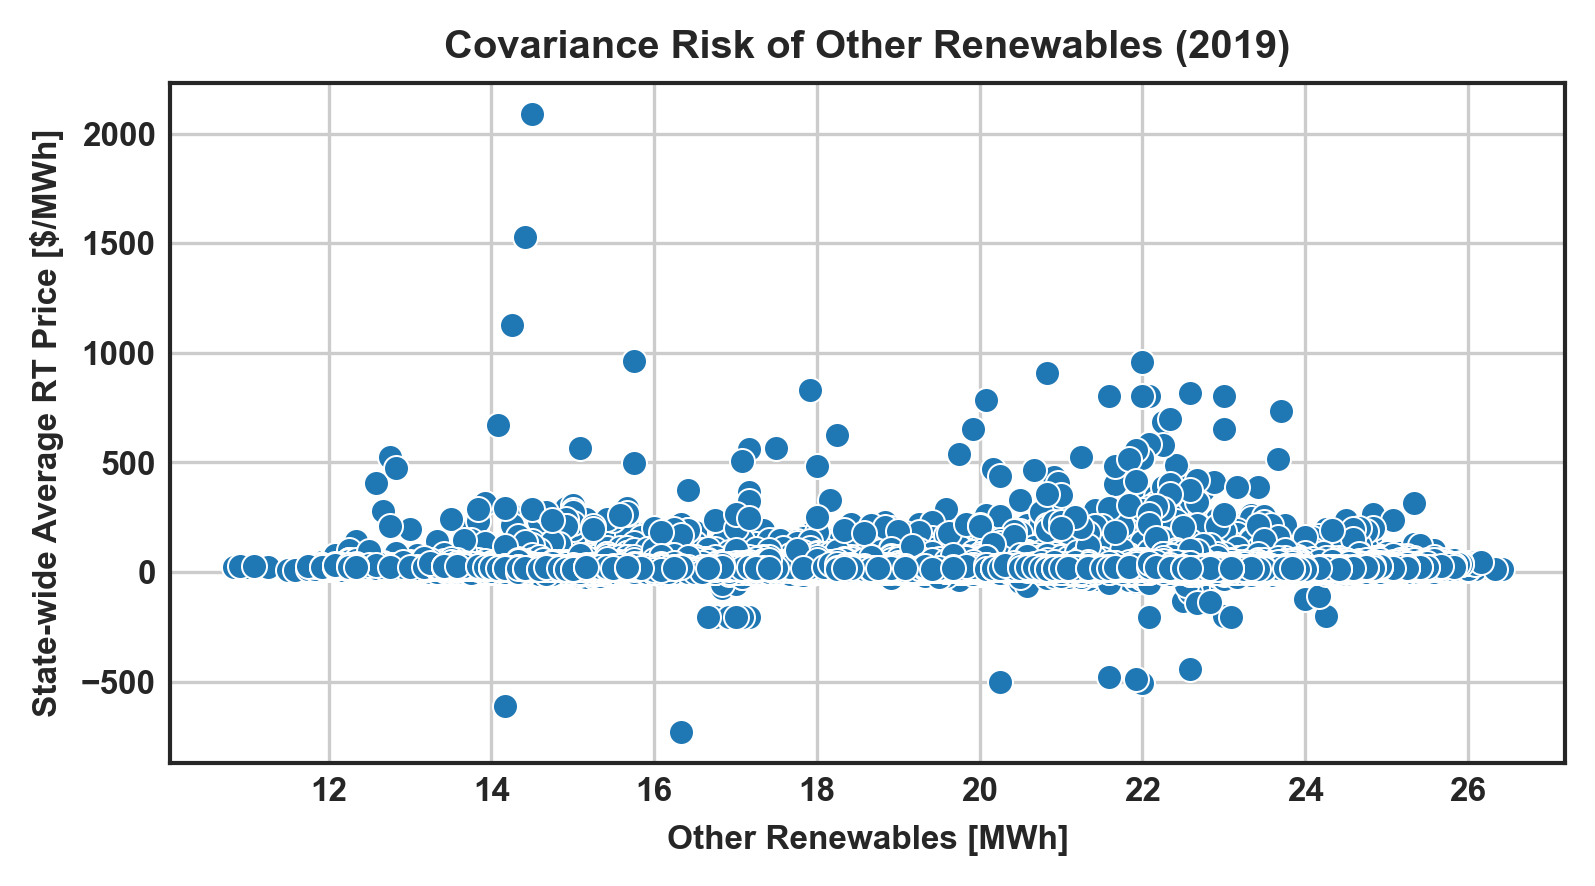

In [11]:
def covariance(year, sources, rt):
    lw_lbmp = table_load_weighted_price(year=year, rt=rt).iloc[:,0] #convert to series
    fuel_mix = NYISOData(dataset="fuel_mix_5m", year=year).df.tz_convert('US/Eastern') # MW
    fuel_mix = (fuel_mix[sources].sum(axis="columns")*1/12) #MW->MWh
    if not rt:
        fuel_mix = fuel_mix.resample("H").sum()
    assert lw_lbmp.index.isin(fuel_mix.index).any(), "Indices are not the same"
    assert len(lw_lbmp.index)==len(fuel_mix.index), "Indices are not the same size"
    return fuel_mix, lw_lbmp

def renewable_covariance(year, rt):
    scatter_kwargs = {"x":None, "y":None,
                      "hue":None, "style":None,
                      "size":None, "data":None, 
                      "palette":None,
                      "hue_order":None, "hue_norm":None,
                      "sizes":None, "size_order":None, "size_norm":None,
                      "markers":True, "style_order":None,
                      "x_bins":None, "y_bins":None, "units":None,
                      "estimator":None, "ci":95, "n_boot":1000,
                      "alpha":None, "x_jitter":None, "y_jitter":None,
                      "legend":'auto',
                      "ax":None}

    for source in ["Wind", "Other Renewables"]:
        da_rt = "RT" if rt else "DA"
        ax_kwargs = {"title":f'Covariance Risk of {source} ({year})',
                     "xlabel":f"{source} [MWh]","ylabel":f"State-wide Average {da_rt} Price [$/MWh]",
                     "xlim":None, "ylim":None}

        fuel_mix, lw_lbmp = covariance(year=year, sources=[source], rt=rt)
        scatter_kwargs.update({"x": fuel_mix.values,
                               "y": lw_lbmp.values})

        fig, ax = plt.subplots(figsize=(6,3), dpi=300)
        sns.scatterplot(**scatter_kwargs)
        ax.set(**ax_kwargs)

for rtorda in [False, True]:
    renewable_covariance(year=2019, rt=rtorda)